# Exploratory Data Analysis
- Naresh Dogra 
- Upgrad Cohort 2018

### Exploratory Data Analysis
##### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not.

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

##### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1648]:
# Exploratory Data Analysis

# Find the character encoding for the file loan.csv file
# Use this encoding to read the file
# This is highly computation intensive operation, we used it to find correct encoding type and 
# then commented out

# import chardet
# from pathlib import Path
# folder = Path('./in-data')
# rawdata = open(folder/'loan.csv', 'rb').read()
# result = chardet.detect(rawdata)
# charenc = result['encoding']
# print(enc)

#The detected encoding was found to be UTF-8.
#Above code has been commented since it has been detected once and we can ignore to run it repeatedly 

In [1649]:
# Let's import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# We have to use latest version as, seabrone: 0.9.0, for Catplot to work
from pathlib import Path

In [1650]:
# Load the input file
#folder = Path('.')

folder = Path('D:/Naresh/Learning/Upgrad/DocumentsUpgrad/Assignments/Loans/M7_EDA_CC/in-data')
eda_main = pd.read_csv(folder/'loan.csv', encoding = "utf-8", dtype={'next_pymnt_d':'str'})
eda_df = pd.read_csv(folder/'loan.csv', encoding = "utf-8", dtype={'next_pymnt_d':'str'})

#We may need to relook at the original data, so eda_main dataframe shall be used for this purpose
#eda_df will be the dataframe which will undergo all the manipulations

In [1651]:
# save initial column list
init_col_list = list(eda_df.columns)

In [1652]:
# Columns could have some whitespace, let's get rid of those
eda_df.columns = eda_df.columns.map(lambda x: x.strip())

In [1653]:
# Find columns that are totally empty or have 100% NaN values
emptycol_list = []
for i in eda_df.columns:
    if eda_df[i].isnull().all() == True:
        emptycol_list.append(i)
#print("Empty columns are: ", emptycol_list)
#print("Total empty columns are:", len(emptycol_list))

In [1654]:
# Let's check if the above logic holds true for a randomly selected column
eda_df['mths_since_last_major_derog'].isnull().sum()

39717

In [1655]:
# Another way to find columns with 100% NaN values
emptycol_list2 = []
for i in eda_df.columns:
    if eda_df[i].isnull().sum() == 39717:
        emptycol_list2.append(i)
#print("Empty columns are: ", emptycol_list2)
#print("Total empty columns are:", len(emptycol_list2))

In [1656]:
# Let's drop all columns having all NaNs
eda_df = eda_df.dropna(axis=1,how='all')
eda_df.shape

(39717, 57)

In [1657]:
list(eda_df.columns.sort_values())

['acc_now_delinq',
 'addr_state',
 'annual_inc',
 'application_type',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'initial_list_status',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'policy_code',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'pymnt_plan',
 'recoveries',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'tax_liens',
 'term',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'verification_status',
 'zip_code']

In [1658]:
eda_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,nan,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0,Jan-96,0,38.000,nan,15,0,27783,53.90%,38,f,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,Jun-16,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000


In [1659]:
# since we can't see many columns, let's widen the column display limit
pd.set_option('display.max_columns', 500)
eda_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,nan,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0,Jan-96,0,38.000,nan,15,0,27783,53.90%,38,f,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,Jun-16,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000


In [1660]:
# All values in URL seem very similar and the numeric data at the end seems to be the id
eda_df['url'].apply(lambda x: x.split('=')[-1])

0        1077501
1        1077430
2        1077175
3        1076863
4        1075358
5        1075269
6        1069639
7        1072053
8        1071795
9        1071570
10       1070078
11       1069908
12       1064687
13       1069866
14       1069057
15       1069759
16       1065775
17       1069971
18       1062474
19       1069742
20       1069740
21       1039153
22       1069710
23       1069700
24       1069559
25       1069697
26       1069800
27       1069657
28       1069799
29       1047704
          ...   
39687     111307
39688     111227
39689     109355
39690     107136
39691     106360
39692      76597
39693     106079
39694      90966
39695      92440
39696     102376
39697     101579
39698      98982
39699      98339
39700      98276
39701      96844
39702      96350
39703      94838
39704      93277
39705      93061
39706      92676
39707      92666
39708      92552
39709      92533
39710      92507
39711      92402
39712      92187
39713      90665
39714      903

In [1661]:
# Looks like url has 'id' related entries
# Split url by '='
# fetch part before '=' and convert to str
eda_df['url_fp'] = eda_df['url'].apply(lambda x: x.split('=')[:-1])
eda_df['url_fp'] = eda_df['url_fp'].astype(str)

# fetch part after '=' and convert to numeric
eda_df['url_id'] = eda_df['url'].apply(lambda x: x.split('=')[-1])
eda_df['url_id'] = eda_df['url_id'].astype(int)

In [1662]:
# Let's compare the 'url_id' with 'id', first convert 'id' to int type
eda_df['id'] = eda_df['id'].astype(int)
eda_df['id'].equals(eda_df['url_id'])

True

In [1663]:
# Let's see the first part of 'url' string is unique
eda_df.url_fp.unique()

array(["['https://lendingclub.com/browse/loanDetail.action?loan_id']"], dtype=object)

In [1664]:
# Since the first part (delimited by '=') of 'url' field is identical across entire column
# And second part is exactly resembling 'id' field, So we can drop URL column and all temporary columns created so far
eda_df.drop(['url', 'url_id', 'url_fp'], axis = 1, inplace = True)

In [1665]:
# Let's see which of the columns have only one unique value in entire series.
# And let's drop those
for i in eda_df.columns:
    if len(eda_df[i].unique()) == 1:
        print(i , eda_df[i].value_counts())
        eda_df.drop(i, axis = 1, inplace=True)

pymnt_plan n    39717
Name: pymnt_plan, dtype: int64
initial_list_status f    39717
Name: initial_list_status, dtype: int64
policy_code 1    39717
Name: policy_code, dtype: int64
application_type INDIVIDUAL    39717
Name: application_type, dtype: int64
acc_now_delinq 0    39717
Name: acc_now_delinq, dtype: int64
delinq_amnt 0    39717
Name: delinq_amnt, dtype: int64


In [1666]:
eda_df.shape

(39717, 50)

In [1667]:
# Let's see which of the columns have only 2 unique entries: a NaN and someother value
for i in eda_df.columns:
    if len(eda_df[i].unique()) == 2:
        print(i , eda_df[i].value_counts())

term  36 months    29096
 60 months    10621
Name: term, dtype: int64
collections_12_mths_ex_med 0.000    39661
Name: collections_12_mths_ex_med, dtype: int64
chargeoff_within_12_mths 0.000    39661
Name: chargeoff_within_12_mths, dtype: int64
tax_liens 0.000    39678
Name: tax_liens, dtype: int64


In [1668]:
# 'term' cannot be dropped since it seems to be an important as there are 2 terms: 36 and 60 months. 
# For now, let's further analyse others 

In [1669]:
eda_df['collections_12_mths_ex_med'].unique()

array([  0.,  nan])

In [1670]:
eda_df['chargeoff_within_12_mths'].unique()

array([  0.,  nan])

In [1671]:
eda_df['tax_liens'].unique()

array([  0.,  nan])

In [1672]:
# Since the above three have no other values apart from NaN and 0., so we can drop all these columns
eda_df.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis = 1, inplace = True)

In [1673]:
# Let's now see which of the columns have high volumn of NULLs
eda_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal 

In [1674]:
#Let's drop columns having high null values
eda_df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis = 1, inplace = True)

In [1675]:
list(eda_df.columns.sort_values())

['addr_state',
 'annual_inc',
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'recoveries',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'verification_status',
 'zip_code']

In [1676]:
eda_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,3,0,13648,83.70%,9,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,May-16,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,3,0,1687,9.40%,4,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,2,0,2956,98.50%,10,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,May-16,0.000
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,10,0,5598,21%,37,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,Apr-16,0.000
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0,Jan-96,0,15,0,27783,53.90%,38,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,May-16,0.000
5,1075269,1311441,5000,5000,5000.000,36 months,7.90%,156.460,A,A4,Veolia Transportaton,3 years,RENT,36000.000,Source Verified,Dec-11,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.200,0,Nov-04,3,9,0,7963,28.30%,12,0.000,0.000,5632.210,5632.210,5000.000,632.210,0.000,0.000,0.000,Jan-15,161.030,Jan-16,0.000
6,1069639,1304742,7000,7000,7000.000,60 months,15.96%,170.080,C,C5,Southern Star Photography,8 years,RENT,47004.000,Not Verified,Dec-11,Fully Paid,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.510,0,Jul-05,1,7,0,17726,85.60%,11,0.000,0.000,10110.840,10110.840,6985.610,3125.230,0.000,0.000,0.000,May-16,1313.760,May-16,0.000
7,1072053,1288686,3000,3000,3000.000,36 months,18.64%,109.430,E,E1,MKC Accounting,9 years,RENT,48000.000,Source Verified,Dec-11,Fully Paid,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.350,0,Jan-07,2,4,0,8221,87.50%,4,0.000,0.000,3939.135,3939.140,3000.000,939.140,0.000,0.000,0.000,Jan-15,111.340,Dec-14,0.000
8,1071795,1306957,5600,5600,5600.000,60 months,21.28%,152.390,F,F2,NaN,4 years,OWN,40000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.550,0,Apr-04,2,11,0,5210,32.60%,13,0.000,0.000,646.020,646.020,162.020,294.940,0.000,189.060,2.090,Apr-12,152.390,Aug-12,0.000
9,1071570,1306721,5375,5375,5350.000,60 months,12.69%,121.450,B,B5,Starbucks,< 1 year,RENT,15000.000,Verified,Dec-11,Charged Off,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.080,0,Sep-04,0,2,0,9279,36.50%,3,0.000,0.000,1476.190,1469.340,673.480,533.420,0.000,269.290,2.520,Nov-12,121.450,Mar-13,0.000


In [1677]:
# The columns 'id' and 'member_id' seem to have some key values
# let's see if we need a composite of these or anyone would suffice
len(eda_df['id'].unique())

39717

In [1678]:
len(eda_df['member_id'].unique())

39717

In [1679]:
# The columns 'id' and 'member_id' seem to be unique individually and any one of them can be used as a key
# Let's drop 'member_id'
eda_df.drop(['member_id'], axis = 1, inplace = True)

In [1680]:
eda_df.shape

(39717, 43)

In [1681]:
#Lets check the corelation between continous variables in the dataframe
Corr=eda_df.corr()
Corr.style.background_gradient()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1,0.141919,0.152286,0.249547,0.086587,0.00873139,0.0959827,-0.00864398,-0.0423784,0.020388,-0.0194397,0.00876295,0.0421493,0.180619,0.180591,0.140045,0.220838,0.112213,0.172856,-0.0550817,0.0334257,-0.0133592,0.122365,-0.00950498
loan_amnt,0.141919,1,0.981578,0.940034,0.930288,0.271149,0.0664393,-0.0318645,0.00922894,0.177168,-0.0512356,0.317597,0.256442,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.0447064,0.135446,0.0728531,0.448742,-0.0371804
funded_amnt,0.152286,0.981578,1,0.958422,0.956159,0.266965,0.0662829,-0.0323552,0.00925914,0.17553,-0.0521693,0.310392,0.250589,0.194941,0.194675,0.90316,0.870799,0.870255,0.737469,0.0467052,0.136284,0.0746757,0.453133,-0.0385015
funded_amnt_inv,0.249547,0.940034,0.958422,1,0.905039,0.254375,0.0746893,-0.0385013,-0.00571206,0.163027,-0.0532139,0.290797,0.242854,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.0427459
installment,0.086587,0.930288,0.956159,0.905039,1,0.270874,0.0541857,-0.0196565,0.00972221,0.172812,-0.0465324,0.312679,0.230824,0.125082,0.124932,0.856928,0.817416,0.850773,0.634725,0.0567094,0.118152,0.075467,0.401688,-0.0341025
annual_inc,0.00873139,0.271149,0.266965,0.254375,0.270874,1,-0.122732,0.0230833,0.0339079,0.1582,-0.0186888,0.279961,0.235771,0.033573,0.033472,0.25798,0.247119,0.259571,0.185476,0.00624336,0.0215888,0.0156038,0.140401,-0.0168008
dti,0.0959827,0.0664393,0.0662829,0.0746893,0.0541857,-0.122732,1,-0.0344516,0.00140517,0.288045,-0.00462054,0.228743,0.229881,0.0360951,0.0360121,0.0647656,0.0716473,0.041316,0.106071,-0.011781,0.0248777,0.0110332,0.00521208,0.0056909
delinq_2yrs,-0.00864398,-0.0318645,-0.0323552,-0.0385013,-0.0196565,0.0230833,-0.0344516,1,0.00809054,0.0116561,0.00746339,-0.0551248,0.0678923,-0.00300789,-0.00320254,-0.0226954,-0.0289759,-0.0387948,0.0230772,0.0306092,0.0123145,0.0139117,-0.0121489,0.00337503
inq_last_6mths,-0.0423784,0.00922894,0.00925914,-0.00571206,0.00972221,0.0339079,0.00140517,0.00809054,1,0.0917134,0.0248023,-0.0223814,0.111499,-0.0121063,-0.0117799,-0.0105595,-0.0202772,-0.0234326,0.0217744,0.0312151,0.0189716,0.0124205,0.0285145,0.0163462
open_acc,0.020388,0.177168,0.17553,0.163027,0.172812,0.1582,0.288045,0.0116561,0.0917134,1,0.000171996,0.288964,0.686635,0.0286884,0.0285136,0.162663,0.152937,0.160631,0.124499,-0.0186268,0.0163958,0.00621893,0.0788653,0.00592997


In [1682]:
# Now let's find some correlation figures and see if we can drop some columns which are highly correlated to others
# Find lower triangle for corr (where we have high -ve or +ve correlations)
# This will help in reducing the dimensions of the dataset to an extent
cor = eda_df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

funded_amnt              loan_amnt         0.982
funded_amnt_inv          loan_amnt         0.940
                         funded_amnt       0.958
installment              loan_amnt         0.930
                         funded_amnt       0.956
                         funded_amnt_inv   0.905
total_acc                open_acc          0.687
out_prncp_inv            out_prncp         1.000
total_pymnt              loan_amnt         0.887
                         funded_amnt       0.903
                         funded_amnt_inv   0.881
                         installment       0.857
total_pymnt_inv          loan_amnt         0.854
                         funded_amnt       0.871
                         funded_amnt_inv   0.913
                         installment       0.817
                         total_pymnt       0.971
total_rec_prncp          loan_amnt         0.852
                         funded_amnt       0.870
                         funded_amnt_inv   0.846
                    

In [1683]:
#Columns 'funded_amnt and funded_amnt_inv seem to be highly correlated. Let's check that
eda_df['funded_amnt'].corr(eda_df['funded_amnt_inv'])

0.95842197674088347

In [1684]:
# Since the correlation is high, Let's drop funded_amnt_inv'
eda_df.drop(['funded_amnt_inv'], axis = 1, inplace = True)

In [1685]:
# Similarly we can drop other investor related numbers: out_prncp_inv and total_pymnt_inv
eda_df.drop(['out_prncp_inv', 'total_pymnt_inv'], axis = 1, inplace = True)

In [1686]:
#Columns 'funded_amnt and 'installment' also seem to be highly correlated. Let's check that
eda_df['funded_amnt'].corr(eda_df['installment'])

0.95615949735568551

In [1687]:
# Since the correlation is high, Let's drop funded_amnt_inv'
eda_df.drop(['installment'], axis = 1, inplace = True)

In [1688]:
#Columns 'collections' and 'collection_recovery_fee' also seem to be highly correlated. Let's check that
eda_df['recoveries'].corr(eda_df['collection_recovery_fee'])

0.79681627874365479

In [1689]:
# There seems to be a significant correlation between recoveries and collection_recovery_fee
# And both of them seem to compliment each other. Let's drop one of them
eda_df.drop(['collection_recovery_fee'], axis = 1, inplace = True)

In [1690]:
#Let's see the correlation between 'loan_amnt' and 'funded_amnt'
eda_df['loan_amnt'].corr(eda_df['funded_amnt'])

0.98157821882376173

In [1691]:
#We can drop 'funded_amnt'
eda_df.drop(['funded_amnt'], axis = 1, inplace = True)

In [1692]:
eda_df

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65%,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,3,0,13648,83.70%,9,0.000,5863.155,5000.000,863.160,0.000,0.000,Jan-15,171.620,May-16,0.000
1,1077430,2500,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,3,0,1687,9.40%,4,0.000,1008.710,456.460,435.170,0.000,117.080,Apr-13,119.660,Sep-13,0.000
2,1077175,2400,36 months,15.96%,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,2,0,2956,98.50%,10,0.000,3005.667,2400.000,605.670,0.000,0.000,Jun-14,649.910,May-16,0.000
3,1076863,10000,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,10,0,5598,21%,37,0.000,12231.890,10000.000,2214.920,16.970,0.000,Jan-15,357.480,Apr-16,0.000
4,1075358,3000,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0,Jan-96,0,15,0,27783,53.90%,38,524.060,3513.330,2475.940,1037.390,0.000,0.000,May-16,67.790,May-16,0.000
5,1075269,5000,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,36000.000,Source Verified,Dec-11,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.200,0,Nov-04,3,9,0,7963,28.30%,12,0.000,5632.210,5000.000,632.210,0.000,0.000,Jan-15,161.030,Jan-16,0.000
6,1069639,7000,60 months,15.96%,C,C5,Southern Star Photography,8 years,RENT,47004.000,Not Verified,Dec-11,Fully Paid,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.510,0,Jul-05,1,7,0,17726,85.60%,11,0.000,10110.840,6985.610,3125.230,0.000,0.000,May-16,1313.760,May-16,0.000
7,1072053,3000,36 months,18.64%,E,E1,MKC Accounting,9 years,RENT,48000.000,Source Verified,Dec-11,Fully Paid,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.350,0,Jan-07,2,4,0,8221,87.50%,4,0.000,3939.135,3000.000,939.140,0.000,0.000,Jan-15,111.340,Dec-14,0.000
8,1071795,5600,60 months,21.28%,F,F2,NaN,4 years,OWN,40000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.550,0,Apr-04,2,11,0,5210,32.60%,13,0.000,646.020,162.020,294.940,0.000,189.060,Apr-12,152.390,Aug-12,0.000
9,1071570,5375,60 months,12.69%,B,B5,Starbucks,< 1 year,RENT,15000.000,Verified,Dec-11,Charged Off,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.080,0,Sep-04,0,2,0,9279,36.50%,3,0.000,1476.190,673.480,533.420,0.000,269.290,Nov-12,121.450,Mar-13,0.000


In [1693]:
# For now, we can drop zip_code also because we have address state:
eda_df.drop(['zip_code'], axis = 1, inplace = True)

In [1694]:
# Let's check if we have rows having high NaNs, say start with 5
eda_df.loc[eda_df.isnull().sum(axis=1) > 5]

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [1695]:
# Since we don't have rows with high number of NaN, we cannot clean row-wise

In [1696]:
#Let us validate some rules
#Let's see if outstanding balance is non-zero 0 only for 'Current' ones
eda_df.loc[(eda_df['loan_status'] == 'Fully Paid') & (eda_df['out_prncp'] != 0)]

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [1697]:
eda_df.loc[(eda_df['loan_status'] == 'Charged Off') & (eda_df['out_prncp'] != 0)]

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [1698]:
eda_df.loc[(eda_df['loan_status'] == 'Current') & (eda_df['out_prncp'] == 0)]

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [1699]:
# Since outstanding principle is non-zero only for 'current' borrowers, we can safely remove the column 'out_prncp'
eda_df.drop(['out_prncp'], axis = 1, inplace = True)

In [1700]:
# Let us now analyze if 'recoveries' are only associated to a particular loan-status category
eda_df.loc[(eda_df['loan_status'] == 'Fully Paid') & (eda_df['recoveries'] != 0)]

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [1701]:
eda_df.loc[(eda_df['loan_status'] == 'Current') & (eda_df['recoveries'] != 0)]

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [1702]:
eda_df.loc[(eda_df['loan_status'] == 'Charged Off') & (eda_df['recoveries'] != 0)]

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,2500,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.000,0,Apr-99,5,3,0,1687,9.40%,4,1008.710,456.460,435.170,0.000,117.080,Apr-13,119.660,Sep-13,0.000
8,1071795,5600,60 months,21.28%,F,F2,NaN,4 years,OWN,40000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,CA,5.550,0,Apr-04,2,11,0,5210,32.60%,13,646.020,162.020,294.940,0.000,189.060,Apr-12,152.390,Aug-12,0.000
9,1071570,5375,60 months,12.69%,B,B5,Starbucks,< 1 year,RENT,15000.000,Verified,Dec-11,Charged Off,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,TX,18.080,0,Sep-04,0,2,0,9279,36.50%,3,1476.190,673.480,533.420,0.000,269.290,Nov-12,121.450,Mar-13,0.000
12,1064687,9000,36 months,13.49%,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,VA,10.080,0,Apr-04,1,4,0,10452,91.70%,9,2270.700,1256.140,570.260,0.000,444.300,Jul-12,305.380,Nov-12,0.000
14,1069057,10000,36 months,10.65%,B,B2,SFMTA,3 years,RENT,100000.000,Source Verified,Dec-11,Charged Off,NaN,other,Other Loan,CA,7.060,0,May-91,2,14,0,11997,55.50%,29,7471.990,5433.470,1393.420,0.000,645.100,Oct-13,325.740,Mar-14,0.000
24,1069559,6000,36 months,11.71%,B,B3,bmg-educational,1 year,RENT,76000.000,Not Verified,Dec-11,Charged Off,NaN,major_purchase,cash,CA,2.400,0,Jun-01,1,7,0,5963,29.70%,7,2050.140,1305.580,475.250,0.000,269.310,Oct-12,198.460,Mar-13,0.000
27,1069657,5000,60 months,16.77%,D,D2,Frito Lay,2 years,RENT,50004.000,Not Verified,Dec-11,Charged Off,Borrower added on 12/16/11 > I have a stable...,other,Other,PA,13.970,3,Oct-03,0,14,0,4345,59.50%,22,1609.120,629.050,719.110,0.000,260.960,Dec-12,123.650,May-13,0.000
46,1069465,5000,36 months,8.90%,A,A5,STERIS Corporation,10+ years,MORTGAGE,100000.000,Source Verified,Dec-11,Charged Off,NaN,debt_consolidation,Debt Consolidation for a better life,OH,16.330,0,Jun-95,0,17,0,74351,62.10%,35,5021.370,4217.380,696.990,0.000,107.000,Aug-14,158.770,Dec-14,0.000
50,1069248,15000,36 months,9.91%,B,B1,Caterpillar Inc.,8 years,MORTGAGE,80000.000,Not Verified,Dec-11,Charged Off,Borrower added on 12/15/11 > Using to pay of...,debt_consolidation,Debt Consolidation Loan,IL,9.120,0,Apr-92,2,9,0,11845,63.70%,28,16177.770,13556.450,2374.340,24.170,222.810,Oct-14,483.380,Mar-15,0.000
53,1069243,12000,36 months,15.96%,C,C5,Chemat Technology Inc,4 years,RENT,50000.000,Not Verified,Dec-11,Charged Off,NaN,car,Car Loan,CA,20.880,0,Oct-06,2,11,0,15793,90.80%,11,3521.950,1903.660,1039.350,0.000,578.940,Aug-12,421.650,Dec-12,0.000


In [1703]:
eda_df

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65%,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.650,0,Jan-85,1,3,0,13648,83.70%,9,5863.155,5000.000,863.160,0.000,0.000,Jan-15,171.620,May-16,0.000
1,1077430,2500,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.000,0,Apr-99,5,3,0,1687,9.40%,4,1008.710,456.460,435.170,0.000,117.080,Apr-13,119.660,Sep-13,0.000
2,1077175,2400,36 months,15.96%,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,IL,8.720,0,Nov-01,2,2,0,2956,98.50%,10,3005.667,2400.000,605.670,0.000,0.000,Jun-14,649.910,May-16,0.000
3,1076863,10000,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,20.000,0,Feb-96,1,10,0,5598,21%,37,12231.890,10000.000,2214.920,16.970,0.000,Jan-15,357.480,Apr-16,0.000
4,1075358,3000,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,OR,17.940,0,Jan-96,0,15,0,27783,53.90%,38,3513.330,2475.940,1037.390,0.000,0.000,May-16,67.790,May-16,0.000
5,1075269,5000,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,36000.000,Source Verified,Dec-11,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,AZ,11.200,0,Nov-04,3,9,0,7963,28.30%,12,5632.210,5000.000,632.210,0.000,0.000,Jan-15,161.030,Jan-16,0.000
6,1069639,7000,60 months,15.96%,C,C5,Southern Star Photography,8 years,RENT,47004.000,Not Verified,Dec-11,Fully Paid,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,NC,23.510,0,Jul-05,1,7,0,17726,85.60%,11,10110.840,6985.610,3125.230,0.000,0.000,May-16,1313.760,May-16,0.000
7,1072053,3000,36 months,18.64%,E,E1,MKC Accounting,9 years,RENT,48000.000,Source Verified,Dec-11,Fully Paid,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,CA,5.350,0,Jan-07,2,4,0,8221,87.50%,4,3939.135,3000.000,939.140,0.000,0.000,Jan-15,111.340,Dec-14,0.000
8,1071795,5600,60 months,21.28%,F,F2,NaN,4 years,OWN,40000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,CA,5.550,0,Apr-04,2,11,0,5210,32.60%,13,646.020,162.020,294.940,0.000,189.060,Apr-12,152.390,Aug-12,0.000
9,1071570,5375,60 months,12.69%,B,B5,Starbucks,< 1 year,RENT,15000.000,Verified,Dec-11,Charged Off,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,TX,18.080,0,Sep-04,0,2,0,9279,36.50%,3,1476.190,673.480,533.420,0.000,269.290,Nov-12,121.450,Mar-13,0.000


In [1704]:
eda_df.shape

(39717, 35)

In [1705]:
# Let's see a few categorical columns, starting with purpose
eda_df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [1706]:
eda_df['emp_title']

0                                                   NaN
1                                                 Ryder
2                                                   NaN
3                                   AIR RESOURCES BOARD
4                              University Medical Group
5                                  Veolia Transportaton
6                             Southern Star Photography
7                                       MKC Accounting 
8                                                   NaN
9                                             Starbucks
10                                Southwest Rural metro
11                                                 UCLA
12                  Va. Dept of Conservation/Recreation
13                                               Target
14                                                SFMTA
15                             Internal revenue Service
16                                    Chin's Restaurant
17                                             D

In [1707]:
# So 'emp_title seems to have many different text values, but they sound like purpose of the loan
# Can we used it as a refined categorical field
eda_df['emp_title'].value_counts()

US Army                                     134
Bank of America                             109
IBM                                          66
AT&T                                         59
Kaiser Permanente                            56
USAF                                         54
Wells Fargo                                  54
UPS                                          53
US Air Force                                 52
Walmart                                      45
Lockheed Martin                              44
United States Air Force                      42
State of California                          42
U.S. Army                                    41
Self Employed                                40
Verizon Wireless                             40
USPS                                         39
US ARMY                                      39
Walgreens                                    38
JP Morgan Chase                              37
JPMorgan Chase                          

In [1708]:
# emp_title does not seem to be a column which we can use for categorical purpose
# so it makes sense to drop emp_title
eda_df.drop(['emp_title'], axis = 1, inplace = True)

In [1709]:
# Similtarly let's see how title looks like
eda_df['title'].value_counts()

Debt Consolidation                                  2184
Debt Consolidation Loan                             1729
Personal Loan                                        659
Consolidation                                        517
debt consolidation                                   505
Home Improvement                                     356
Credit Card Consolidation                            356
Debt consolidation                                   334
Small Business Loan                                  328
Credit Card Loan                                     317
Personal                                             308
Consolidation Loan                                   255
Home Improvement Loan                                247
personal loan                                        234
personal                                             220
Loan                                                 213
Wedding Loan                                         208
consolidation                  

In [1710]:
# As per data description file, title is just application title
# and we have a more refined categorical data 'purpose' similar to this, let's drop this as well
eda_df.drop(['title'], axis = 1, inplace = True)

In [1711]:
eda_df.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,27.650,0,Jan-85,1,3,0,13648,83.70%,9,5863.155,5000.000,863.160,0.000,0.000,Jan-15,171.620,May-16,0.000
1,1077430,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,1.000,0,Apr-99,5,3,0,1687,9.40%,4,1008.710,456.460,435.170,0.000,117.080,Apr-13,119.660,Sep-13,0.000
2,1077175,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,NaN,small_business,IL,8.720,0,Nov-01,2,2,0,2956,98.50%,10,3005.667,2400.000,605.670,0.000,0.000,Jun-14,649.910,May-16,0.000
3,1076863,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,20.000,0,Feb-96,1,10,0,5598,21%,37,12231.890,10000.000,2214.920,16.970,0.000,Jan-15,357.480,Apr-16,0.000
4,1075358,3000,60 months,12.69%,B,B5,1 year,RENT,80000.000,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,17.940,0,Jan-96,0,15,0,27783,53.90%,38,3513.330,2475.940,1037.390,0.000,0.000,May-16,67.790,May-16,0.000


In [1712]:
eda_df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [1713]:
# So only 'charged_off' loans have 'recoveries' associated, let's drop 'recoveries' then
eda_df.drop(['recoveries'], axis = 1, inplace = True)

In [1714]:
eda_df.shape

(39717, 32)

In [1715]:
# First let's create a list of all columns that we removed
diff_cols = set(init_col_list) - set(eda_df.columns)
len(diff_cols)

79

In [1716]:
eda_df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [1717]:
eda_df.shape

(39717, 32)

In [1718]:
eda_df.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,27.650,0,Jan-85,1,3,0,13648,83.70%,9,5863.155,5000.000,863.160,0.000,Jan-15,171.620,May-16,0.000
1,1077430,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,1.000,0,Apr-99,5,3,0,1687,9.40%,4,1008.710,456.460,435.170,0.000,Apr-13,119.660,Sep-13,0.000
2,1077175,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,NaN,small_business,IL,8.720,0,Nov-01,2,2,0,2956,98.50%,10,3005.667,2400.000,605.670,0.000,Jun-14,649.910,May-16,0.000
3,1076863,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,20.000,0,Feb-96,1,10,0,5598,21%,37,12231.890,10000.000,2214.920,16.970,Jan-15,357.480,Apr-16,0.000
4,1075358,3000,60 months,12.69%,B,B5,1 year,RENT,80000.000,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,17.940,0,Jan-96,0,15,0,27783,53.90%,38,3513.330,2475.940,1037.390,0.000,May-16,67.790,May-16,0.000


In [1719]:
eda_df['int_rate'].unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%', '18.64%',
       '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%', '12.42%',
       '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%', '19.91%',
       '17.27%', '17.58%', '21.67%', '19.42%', '22.06%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.52%', '23.13%', '22.74%',
       '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%', '5.99%',
       '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%', '16.49%',
       '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%', '17.49%',
       '15.62%', '21.36%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.62%', '20.99%', '22.85%', '19.69%', '20.25%',
       '23.22%', '21.74%', '22.48%', '23.59%', '12.62%', '18.07%',
       '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%', '19.39%',
       '16.11%', '17.54%', '22.64%', '13.84%', '16.59%', '17.19%',
       '12.87%', '20.69%', '9.67%', '21.82%', '19.79%', '18.49%', '22.94%'

In [1720]:
# Let's now cleanup the interest rate column 
# remove % sign and convert to float type
eda_df.int_rate = pd.Series(eda_df.int_rate).str.replace('%', '').astype(float)

In [1721]:
# Let's now focus on emp_length column
eda_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan], dtype=object)

In [1722]:
# Let's clean the emp_length 
# impute NaNs to 0
# remove special characters
# and convert to numeric structure
eda_df.emp_length.fillna(value=0,inplace=True)
eda_df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
eda_df['emp_length'] = eda_df['emp_length'].astype(int)
eda_df['emp_length'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7,  0], dtype=int64)

In [1723]:
eda_df.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,36 months,10.650,B,B2,10,RENT,24000.000,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,27.650,0,Jan-85,1,3,0,13648,83.70%,9,5863.155,5000.000,863.160,0.000,Jan-15,171.620,May-16,0.000
1,1077430,2500,60 months,15.270,C,C4,1,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,1.000,0,Apr-99,5,3,0,1687,9.40%,4,1008.710,456.460,435.170,0.000,Apr-13,119.660,Sep-13,0.000
2,1077175,2400,36 months,15.960,C,C5,10,RENT,12252.000,Not Verified,Dec-11,Fully Paid,NaN,small_business,IL,8.720,0,Nov-01,2,2,0,2956,98.50%,10,3005.667,2400.000,605.670,0.000,Jun-14,649.910,May-16,0.000
3,1076863,10000,36 months,13.490,C,C1,10,RENT,49200.000,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,20.000,0,Feb-96,1,10,0,5598,21%,37,12231.890,10000.000,2214.920,16.970,Jan-15,357.480,Apr-16,0.000
4,1075358,3000,60 months,12.690,B,B5,1,RENT,80000.000,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,17.940,0,Jan-96,0,15,0,27783,53.90%,38,3513.330,2475.940,1037.390,0.000,May-16,67.790,May-16,0.000


In [1724]:
#revolving utilization also has % signs, let's get rid of those as well
eda_df.revol_util = pd.Series(eda_df.revol_util).str.replace('%', '').astype(float)
eda_df.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,36 months,10.650,B,B2,10,RENT,24000.000,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,27.650,0,Jan-85,1,3,0,13648,83.700,9,5863.155,5000.000,863.160,0.000,Jan-15,171.620,May-16,0.000
1,1077430,2500,60 months,15.270,C,C4,1,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,1.000,0,Apr-99,5,3,0,1687,9.400,4,1008.710,456.460,435.170,0.000,Apr-13,119.660,Sep-13,0.000
2,1077175,2400,36 months,15.960,C,C5,10,RENT,12252.000,Not Verified,Dec-11,Fully Paid,NaN,small_business,IL,8.720,0,Nov-01,2,2,0,2956,98.500,10,3005.667,2400.000,605.670,0.000,Jun-14,649.910,May-16,0.000
3,1076863,10000,36 months,13.490,C,C1,10,RENT,49200.000,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,20.000,0,Feb-96,1,10,0,5598,21.000,37,12231.890,10000.000,2214.920,16.970,Jan-15,357.480,Apr-16,0.000
4,1075358,3000,60 months,12.690,B,B5,1,RENT,80000.000,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,17.940,0,Jan-96,0,15,0,27783,53.900,38,3513.330,2475.940,1037.390,0.000,May-16,67.790,May-16,0.000


In [1725]:
# Some More Data Validations
# Let's see if all charged off loans have resulted in losses 
eda_df.loc[((eda_df.total_pymnt == eda_df.loan_amnt) & (eda_df.loan_status == 'Charged Off'))]
#print ((eda_df.total_pymnt == eda_df.loan_amnt) & (eda_df.loan_status == 'Charged Off')).value_counts().unique()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
462,1063788,4200,60 months,17.270,D,D3,9,RENT,43000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/09/11 > job is stable<b...,debt_consolidation,AZ,10.130,0,Nov-96,1,9,0,8843,77.000,19,4200.000,2381.460,1807.620,0.000,Apr-15,105.000,May-16,0.000
4206,1006579,1800,36 months,8.900,A,A5,9,RENT,50400.000,Not Verified,Nov-11,Charged Off,Borrower added on 10/28/11 > I need this loa...,wedding,CA,2.640,0,Oct-98,1,3,0,1930,16.100,10,1800.000,0.000,0.000,0.000,NaN,0.000,May-16,0.000
13969,772782,12325,60 months,11.490,B,B4,2,RENT,42000.000,Not Verified,Jun-11,Charged Off,Borrower added on 06/06/11 > This money will...,house,PA,17.030,0,Sep-98,1,11,0,29254,33.600,18,12325.000,0.000,0.000,0.000,NaN,0.000,May-16,0.000


In [1726]:
# So there are some charged off loans that have not resulted in a loss 
#(if bank feels that the loan_amnt has been has been recovered from total_pmnt)
# Anyway the no. is very less, so we can keep it aside as of now

In [1727]:
# Count of loan statuses
eda_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

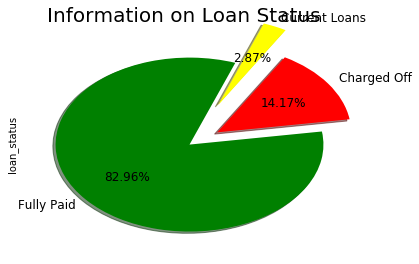

In [1728]:
#Pie chart to get the percentage of charged of to fully paid loans
#f, ax = plt.plots(1,1, figsize=(16,8))

colors = ['green', 'red', 'yellow']
label1 = list(['Fully Paid','Charged Off','Current Loans'])
plt.suptitle('Information on Loan Status', fontsize=20)
eda_df['loan_status'].value_counts().plot.pie(explode=[0,0.25,0.50], autopct='%1.2f%%',labels=label1, shadow=True, colors=colors, fontsize=12, startangle=70)

In [1729]:
#Lets find the metric for comparison.
#Not able to find a suitable metric with existing columns
#Lets introduce a data driven derived metric PAY_TO_LOAN which is
#the percentage of total_rec_prncp to loan amount.We will use this derived metric for our analysis.
#For fully paid loans the value of pay_to_loan will be 100
#For charged off loans the value will be lesser than 100.
#Lets compare this metric against various categorical variables and continous variables to arrive at conclusion
eda_df['pay_to_loan']=(eda_df['total_rec_prncp']/eda_df['loan_amnt'])*100

In [1730]:
#eda_df.pay_to_loan
# compare the mean and median values across categories
#we can see there is  a difference in mean and median
eda_df.pivot_table(values='pay_to_loan', columns='loan_status', aggfunc=[np.median, np.mean])
#eda_df.loc[eda_df['total_pymnt']>eda_df['loan_amnt']]

median                           mean                   
loan_status Charged Off Current Fully Paid Charged Off Current Fully Paid
pay_to_loan      29.794  88.455    100.000      34.991  87.601     98.650

In [1731]:
# INSIGHT : 
# So close to 14% of loans are charged off

Text(0.5,1,'dti')

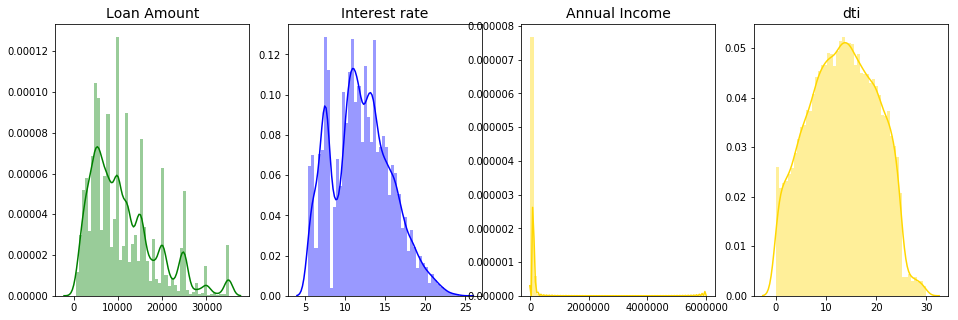

In [1732]:
# As per definitions, variables loan_amnt, int_rate, ann_inc and dti seem to be some driving factors in deciding upon the loan applications
# Let's plot the univariate distributions of these variables to have a deeper insight of these

fig, ax = plt.subplots(1, 4, figsize=(16,5))

loan_amount = eda_df["loan_amnt"].values
int_rat = eda_df["int_rate"].values
ann_inc = eda_df["annual_inc"].values
dti1 = eda_df["dti"].values

sns.distplot(loan_amount, ax=ax[0], color="green")
ax[0].set_title("Loan Amount", fontsize=14)
sns.distplot(int_rat, ax=ax[1], color="blue")
ax[1].set_title("Interest rate", fontsize=14)
sns.distplot(ann_inc, ax=ax[2], color="gold")
ax[2].set_title("Annual Income", fontsize=14)
sns.distplot(dti1, ax=ax[3], color="gold")
ax[3].set_title("dti", fontsize=14)

In [1733]:
#From the loan amount plot we can see some outliers.Let us remove those and do analysis on a segment
#iqr = np.subtract(*np.percentile(eda_df['loan_amnt'], [75, 25]))
#print(iqr)
#q = eda_df['loan_amnt'].quantile(0.95)
#g = eda_df['loan_amnt'].quantile(0.05)
#eda_df = eda_df.loc[(eda_df['loan_amnt']<q)&(eda_df['loan_amnt']>g)]
#eda_df.head()

In [1734]:
#Lets check mean median after removing outliers
eda_df.pivot_table(values='pay_to_loan', columns='loan_status', aggfunc=[np.median, np.mean])
#eda_df.loc[eda_df['total_pymnt']>eda_df['loan_amnt']]

median                           mean                   
loan_status Charged Off Current Fully Paid Charged Off Current Fully Paid
pay_to_loan      29.794  88.455    100.000      34.991  87.601     98.650

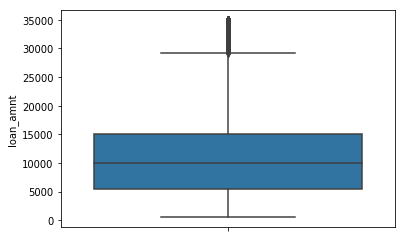

In [1735]:
#Lets do some univariate analysis on data
#relationship between loan status and dti
#we can observe that mean is just slightly higher and feel dti should not affect loan status
sns.boxplot(y='loan_amnt',data=eda_df)

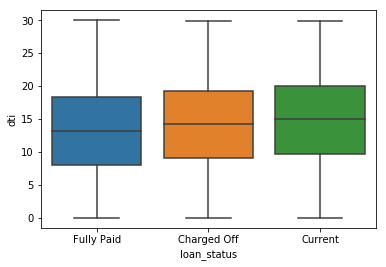

In [1736]:
#relationship between loan status and dti
#we can observe that median is just slightly higher
# Higher DTI does make the profile of customer riskier, 
# especially if some other variables along with DTI suggest the same.
# For the time being we will consider higher DTI to ahve higher risk for approving loan
sns.boxplot(x='loan_status',y='dti',data=eda_df)

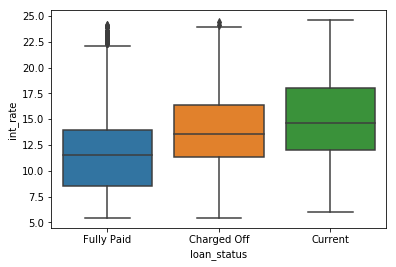

In [1737]:
#relationship between loan status and int_rate
#we can observe that mean is higher for higher interest rates also 25,75th and max are above for charged off
#when compared to fully paid which indicates that if int rates are higher tendency to default becomes high
#The below box plot indicates that in the past whereever charge offs have happened, the interest were not 
#necessariry very high. To adequately cover the risk, the  interest rates for on-going loans have been kept higher.  
sns.boxplot(x='loan_status',y='int_rate',data=eda_df)

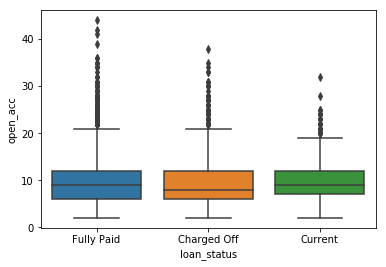

In [1738]:
#relationship between loan status and open_acc
sns.boxplot(x='loan_status',y='open_acc',data=eda_df)

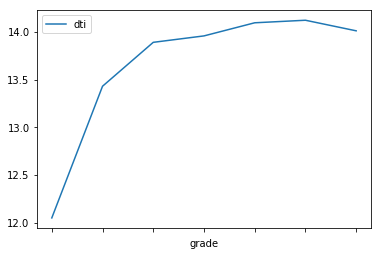

In [1739]:
#lower the grade higher the dti.
#LINEAR RELATIONSHIP
eda_df2 = eda_df.groupby(['grade']).mean()[['dti']]
eda_df2.plot.line()

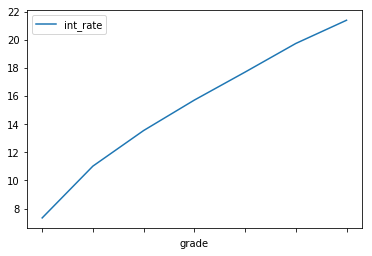

In [1740]:
#relationship between grade and int rate
eda_df2 = eda_df.groupby(['grade']).mean()[['int_rate']]
eda_df2.plot.line()

In [1741]:
# Let's now focus on loand grades
eda_df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

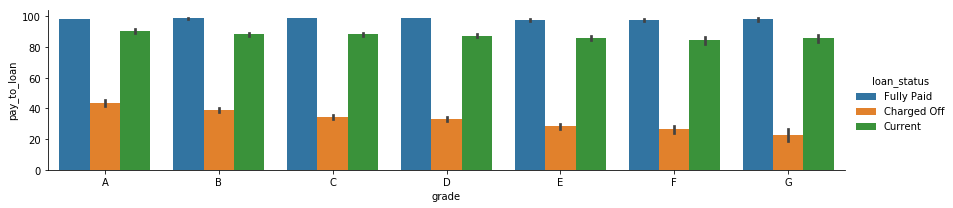

In [1742]:
#Grade wise fully paid to charged off loans
#This gives a clear picture that lower the grade score there is  risk for default
#As you can see percentage of loan_to_pay decreases with lower grade
# pay_to_loan is percentage of principal paid against loan amount
sns.catplot(x="grade",y="pay_to_loan", hue="loan_status",kind="bar",data=eda_df.sort_values(['grade']).reset_index(), height=3, aspect=4) 

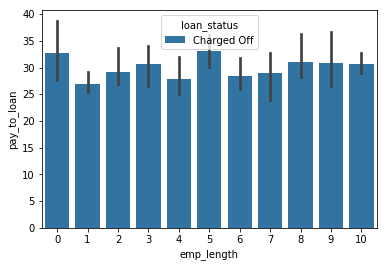

In [1743]:
#Variation of Charged loan status with length of employment
#Length of employment has no effect or there is no pattern to identify if emp lengthaffects charged off cases.
sns.barplot(x="emp_length", y="pay_to_loan", hue="loan_status", data=eda_df.loc[eda_df['loan_status']=='Charged Off'],estimator=np.median)


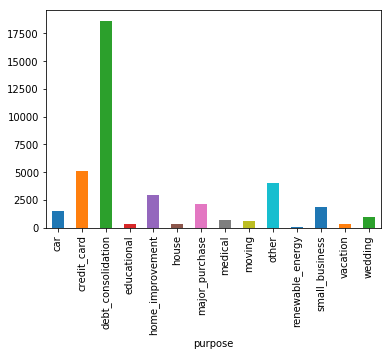

In [1744]:
#This indicates that people opting for debt consolidation is high
eda_temp1=eda_df.groupby(['purpose']).count()['pay_to_loan']
eda_temp1.plot.bar()

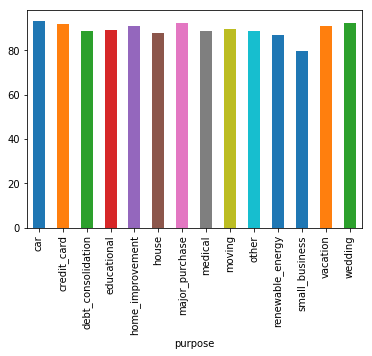

In [1745]:
#This indicates that people tend to default when purpose is small business
eda_temp1=eda_df.groupby(['purpose']).mean()['pay_to_loan']
eda_temp1.plot.bar()

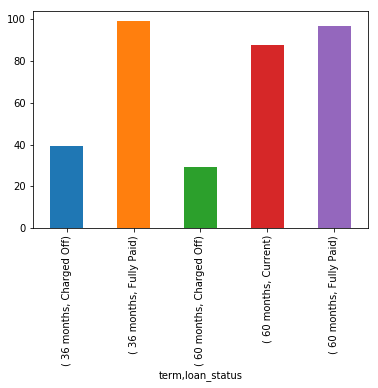

In [1746]:
# Pay_to_loan percentage (y-axis) against
eda_temp1=eda_df.groupby(['term','loan_status']).mean()['pay_to_loan']
eda_temp1.plot.bar()

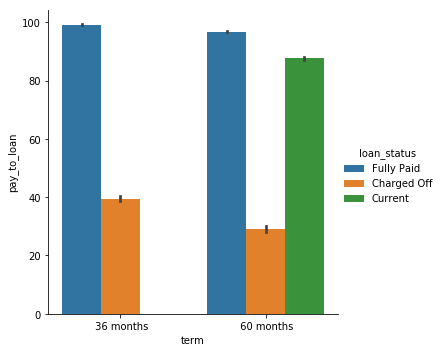

In [1747]:
#bivariate analysis
#This indicates that people tend to default when term is 60 than 36
sns.catplot(x='term', y="pay_to_loan",hue="loan_status", kind='bar',data=eda_df)

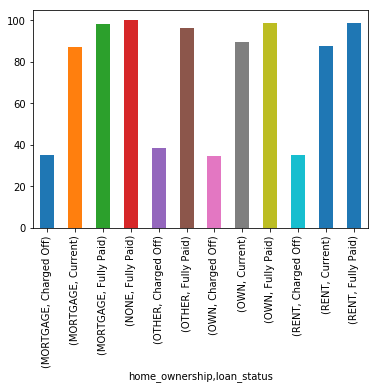

In [1748]:
#The shape below is not helping much in seeing a relationship between home ownership and loan_status
eda_temp1=eda_df.groupby(['home_ownership','loan_status']).mean()['pay_to_loan']
eda_temp1.plot.bar()

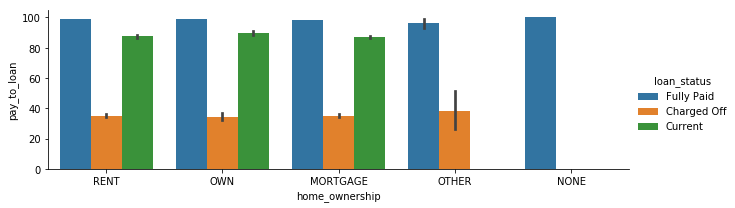

In [1749]:
sns.catplot(x='home_ownership', y="pay_to_loan",hue="loan_status", kind='bar',height= 3, aspect=3, data=eda_df)

Text(0,0.5,'Average loan amount')

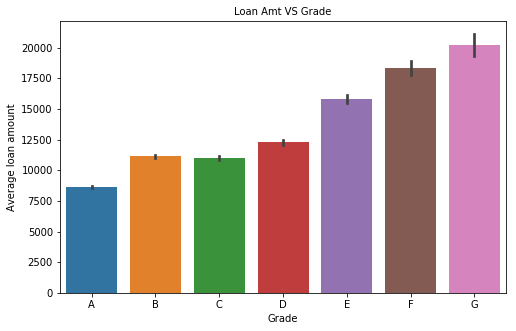

In [1750]:
# Now let's see the average loan amount versus the grades
plt.figure(figsize=(8,5))
sns.barplot('grade', 'loan_amnt', data=eda_df.sort_values(['grade']).reset_index())
plt.title('Loan Amt VS Grade', fontsize=10)
plt.xlabel('Grade', fontsize=10)
plt.ylabel('Average loan amount', fontsize=10)

In [1751]:
def days_hours_minutes(td):
    return td.days

In [1752]:
#Earliest Credit Line ## We tried to find some relationships here but did not turn out to be very useful
#earliest_cr_line is currently an object dtype however we don't want to convert it to a date, rather a scalar to describe the length of time since the first line of credit. We are asserting that if all variables are held equal (number of lines open, income, delinquencies, verfied income); the longer you've had lines of credit the better.
#Conversely an acturary might asses that we can end up with a "u-shaped" distribution in that if you are the extreme end of years, you are a higher risk as you have a higher chance of mortality thus a lower probability of repayment. Additionally pre-retirement debitors are more likely to list job or health reasons as the primary cause of their bankruptcy.
#In a more advanced implementation we'd want to account for confounding variables in that certain applicant groups, 
#the older you are (time since first credit line) the larger your earning potential/power 
#and thus the better loan you might secure, however this increase in salary might be negligible if the amount of discretionary money spent or need for a loan scales in some proportion to the salary size.
from datetime import datetime


#eda_df.groupby(['earliest_cr_line','loan_status']).id.count()
dttoday = datetime.now().today()
eda_df.earliest_cr_line = dttoday - pd.to_datetime(eda_df['earliest_cr_line'],format='%Y-%m-%d',errors = 'coerce',infer_datetime_format =True)
#eda_df.earliest_cr_line2=eda_df.earliest_cr_line2.days
#eda_df.loc[~eda_df['earliest_cr_line'].isnull()]
#dttoday = datetime.now().today()
#print(dttoday)
#eda_df.earliest_cr_line2 = eda_df.earliest_cr_line.apply(lambda x: (x - pd.Timestamp(dttoday)),'D').astype(int)/-365)
#eda_df.earliest_cr_line2.apply(lambda x: (x.date()-datetime.datetime.now().strftime("%Y-%m-%d")))
#eda_df.earliest_cr_line2

#There is a better way to do this :)
#eda_df.earliest_cr_line2 = eda_df.earliest_cr_line.isnull().apply(lambda x:  pd.Timestamp(dttoday))
#eda_df.earliest_cr_line2 = eda_df.earliest_cr_line2.apply(lambda x: (np.timedelta64((x.date() - pd.Timestamp(dttoday)),'D').astype(int))/-365)
eda_df['earliest_cr_line2']=eda_df['earliest_cr_line'].apply(lambda x : days_hours_minutes(x))
#eda_df.earliest_cr_line2

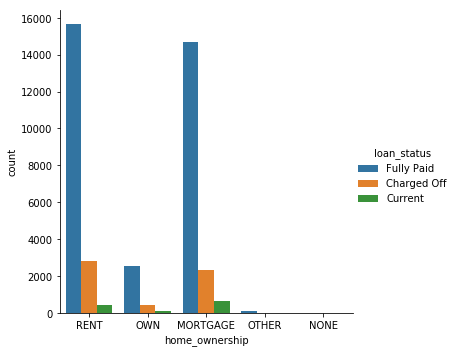

In [1753]:
# Let's see the effect of home ownership counts across varius loan_satus
sns.catplot(x="home_ownership",hue="loan_status",kind='count',data=eda_df)

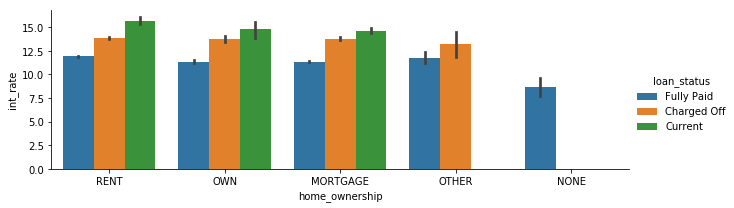

In [1754]:
# Let's see how the interest rates vary based on different values of home ownership across loan_satus
sns.catplot(x="home_ownership",y="int_rate",hue="loan_status",kind='bar',height =3, aspect=3, data=eda_df)

In [1755]:
eda_df.dtypes

id                                int32
loan_amnt                         int64
term                             object
int_rate                        float64
grade                            object
sub_grade                        object
emp_length                        int32
home_ownership                   object
annual_inc                      float64
verification_status              object
issue_d                          object
loan_status                      object
desc                             object
purpose                          object
addr_state                       object
dti                             float64
delinq_2yrs                       int64
earliest_cr_line        timedelta64[ns]
inq_last_6mths                    int64
open_acc                          int64
pub_rec                           int64
revol_bal                         int64
revol_util                      float64
total_acc                         int64
total_pymnt                     float64


# A few more derived metrics 

In [1756]:
# Let's now have only 2 categories of loans:  charged off (1) and non-charged off (0)
eda_df['is_charged_off'] = eda_df['loan_status'].apply(lambda x: "1" if x == "Charged Off" else "0").astype(int)

In [1757]:
# Now, tag the IDs delinquent (indicating with a new column) (0 - non-delinquent and 1 = delinquent)
eda_df['id_delinquent'] = eda_df.groupby(id)['is_charged_off'].transform('sum').apply(lambda x:"0" if x==0 else 1).astype(int)

In [1758]:
eda_df[['id_delinquent']].head()

,id_delinquent
0,0
1,1
2,0
3,0
4,0


In [1759]:
# Now we will focus on revolving balance, annual income, dti and loan amount. So a temporary dataframe with these 4 attributes
eda_dti_bal = eda_df[['revol_bal','annual_inc', 'dti','loan_amnt']]
eda_dti_bal = eda_dti_bal.copy()

In [1760]:
# Let's derived a new column indicative of tota debt
# Here the logic is that the total debt, as amount, of a customer is a product of his monthly income and dti
eda_dti_bal['monthly_inc'] = round(eda_dti_bal['annual_inc']/12)
eda_dti_bal['total_monthly_debt'] = ((eda_dti_bal['monthly_inc']) * eda_dti_bal['dti'])/100

In [1761]:
# A new column for monthly income
eda_dti_bal['emi'] = eda_main['installment']


In [1762]:
# Total liabilty of an individual should be revolving balance + his total debt calculated above
eda_dti_bal['total_liability'] = round(eda_dti_bal['revol_bal'] + eda_dti_bal['total_monthly_debt'])

In [1763]:
# Now to offer a loan the customer must have some remaining income, which can be calculated as below
eda_dti_bal['remaining_inc'] = round(eda_dti_bal['monthly_inc'] - eda_dti_bal['total_liability'])
#if remaining_inc is +ve then it is fine to offer loan
# if it is negative then it is riskier. or should we consider the true_DTI

In [1764]:
# Let's now create a column that captues the impact of someone's EMI vs his remaining income at hands
eda_dti_bal['emi_inc_impact_%'] = round((eda_dti_bal['emi']/eda_dti_bal['remaining_inc'])*100,2)  

In [1765]:
# revolving monthly balance vs monthly income- trying to see how much financial burden is there on monthly basis
# higher the burden, riskier the customer
eda_dti_bal['revol_to_month_inc'] = round(eda_dti_bal['revol_bal']/eda_dti_bal['monthly_inc'],1)


In [1766]:
#Adding the derived attribute is_charged_off caluclated earleir to this dataframe
eda_dti_bal['is_charged_off'] = eda_df['is_charged_off']

In [1767]:
eda_dti_bal.head(10)

,revol_bal,annual_inc,dti,loan_amnt,monthly_inc,total_monthly_debt,emi,total_liability,remaining_inc,emi_inc_impact_%,revol_to_month_inc,is_charged_off
0,13648,24000.000,27.650,5000,2000.000,553.000,162.870,14201.000,-12201.000,-1.330,6.800,0
1,1687,30000.000,1.000,2500,2500.000,25.000,59.830,1712.000,788.000,7.590,0.700,1
2,2956,12252.000,8.720,2400,1021.000,89.031,84.330,3045.000,-2024.000,-4.170,2.900,0
3,5598,49200.000,20.000,10000,4100.000,820.000,339.310,6418.000,-2318.000,-14.640,1.400,0
4,27783,80000.000,17.940,3000,6667.000,1196.060,67.790,28979.000,-22312.000,-0.300,4.200,0
5,7963,36000.000,11.200,5000,3000.000,336.000,156.460,8299.000,-5299.000,-2.950,2.700,0
6,17726,47004.000,23.510,7000,3917.000,920.887,170.080,18647.000,-14730.000,-1.150,4.500,0
7,8221,48000.000,5.350,3000,4000.000,214.000,109.430,8435.000,-4435.000,-2.470,2.100,0
8,5210,40000.000,5.550,5600,3333.000,184.981,152.390,5395.000,-2062.000,-7.390,1.600,1
9,9279,15000.000,18.080,5375,1250.000,226.000,121.450,9505.000,-8255.000,-1.470,7.400,1


In [1768]:
# Let's bin the revolving balance to monthly income
# upto 0.9 - ok
# 1 to 2 - low
# 3+ > critical (means chances of default high)
eda_dti_bal['revolbal_inc_cat'] = eda_dti_bal['revol_to_month_inc'].apply(lambda x: 'ok' if x<=0.9 else 'low' if (x>=1 and x <=2) else 'critical')

In [1769]:
eda_dti_bal.tail(10)

,revol_bal,annual_inc,dti,loan_amnt,monthly_inc,total_monthly_debt,emi,total_liability,remaining_inc,emi_inc_impact_%,revol_to_month_inc,is_charged_off,revolbal_inc_cat
39707,60568,180000.000,11.930,5000,15000.000,1789.500,159.770,62358.000,-47358.000,-0.340,4.000,0,critical
39708,28329,48000.000,8.030,5000,4000.000,321.200,161.250,28650.000,-24650.000,-0.650,7.100,0,critical
39709,27185,80000.000,1.210,5000,6667.000,80.671,164.230,27266.000,-20599.000,-0.800,4.100,0,critical
39710,216,85000.000,0.310,5000,7083.000,21.957,155.380,238.000,6845.000,2.270,0.000,0,ok
39711,66033,75000.000,15.550,5000,6250.000,971.875,158.300,67005.000,-60755.000,-0.260,10.600,0,critical
39712,7274,110000.000,11.330,2500,9167.000,1038.621,78.420,8313.000,854.000,9.180,0.800,0,ok
39713,8847,18000.000,6.400,8500,1500.000,96.000,275.380,8943.000,-7443.000,-3.700,5.900,0,critical
39714,9698,100000.000,2.300,5000,8333.000,191.659,156.840,9890.000,-1557.000,-10.070,1.200,0,low
39715,85607,200000.000,3.720,5000,16667.000,620.012,155.380,86227.000,-69560.000,-0.220,5.100,0,critical
39716,4175,22000.000,14.290,7500,1833.000,261.936,255.430,4437.000,-2604.000,-9.810,2.300,0,critical


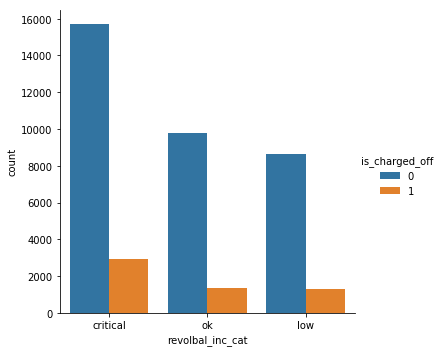

In [1770]:
# Plotting the bins volumewise (emi_ic_cat) for chargedoff vs non-chargedoff
sns.catplot(x='revolbal_inc_cat', hue="is_charged_off",kind='count',data=eda_dti_bal)

In [1771]:
tot = sum(eda_dti_bal.loc[eda_dti_bal['is_charged_off'] == 1]['is_charged_off'])

In [1772]:
eda_dti_bal.groupby(['is_charged_off','revolbal_inc_cat']).size()

is_charged_off  revolbal_inc_cat
0               critical            15695
                low                  8635
                ok                   9760
1               critical             2940
                low                  1315
                ok                   1372
dtype: int64

In [1773]:
# Let's calculate teh relativce percentages of ecah category (critical, low, ok) for revolving balance to monthly income
# These relative values will be respective weights, as percentage, for the loans which charged off
w_critical = sum(eda_dti_bal.loc[(eda_dti_bal['is_charged_off'] == 1) & (eda_dti_bal['revolbal_inc_cat'] == 'critical')]['is_charged_off'])
w_critical = round((w_critical/tot)*100,1)
w_low = sum(eda_dti_bal.loc[(eda_dti_bal['is_charged_off'] == 1) & (eda_dti_bal['revolbal_inc_cat'] == 'low')]['is_charged_off'])
w_low = round((w_low/tot)*100,1)
w_ok = sum(eda_dti_bal.loc[(eda_dti_bal['is_charged_off'] == 1) & (eda_dti_bal['revolbal_inc_cat'] == 'ok')]['is_charged_off'])
w_ok = round((w_ok/tot)*100,1)
print('w_critical = {}, w_low = {}, w_ok = {}'.format(w_critical,w_low,w_ok))

w_critical = 52.2, w_low = 23.4, w_ok = 24.4


In [1774]:
eda_dti_bal[['revol_to_month_inc']].describe()

,revol_to_month_inc
count,39717.000
mean,2.435
std,2.248
min,0.000
25%,0.800
50%,1.900
75%,3.400
max,37.400


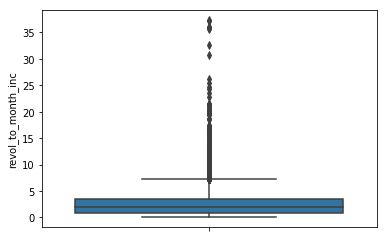

In [1775]:
# box plot for revol_to_month_inc shows that there are many outliers
sns.boxplot(y='revol_to_month_inc',data=eda_dti_bal)

In [1776]:
# Let's have the final features, the parameters we will use to conclude our analysis 
#eda_final = eda_df[['purpose','dti','revol_util', 'emp_length', 'pub_rec_bankruptcies','delinq_2yrs', 'id_delinquent']]
eda_final = eda_df[['purpose','dti','revol_util', 'emp_length', 'pub_rec_bankruptcies','delinq_2yrs']]
eda_final = eda_final.copy()

In [1777]:
eda_final['id'] = eda_df['id']
eda_final['is_charged_off'] = eda_df['is_charged_off']
eda_final.head()
eda_final.dtypes

purpose                  object
dti                     float64
revol_util              float64
emp_length                int32
pub_rec_bankruptcies    float64
delinq_2yrs               int64
id                        int32
is_charged_off            int32
dtype: object

In [1778]:
# The final analysis is based on the below logic:
# 1. Inter_feature_weight: [as Percentage]
# This is relative importance of each of the selected features
# This will be done by finding correlation between charged_off column and other features
# Higher the correlation value, higher the importance 
# The relative importance will be indicated by score from 1-100 i.e. as a percentage
# An exeception to this is column' id' - if there is a charge off against a particular id 
# then for sure loan will not be approved. Correlation value will not be used between 'id' and 'charged_off'.

# 2. Intra_feature_weight [as Percentage]
# For each feature we will produce a table with 
# Weights - Percentage of chargeoffs against a particular category within a feature
# For that, we will first identify categories or bins/buckets within each feature
# And then count of charge offs against each bin/category divided by total count of chargeoffs for that feature

# 3. overall Risk weight 
# The overall risk weight will be quanified as 
# (Inter_feature_weight * Intra_feature_weight)

# 4. Risk_Threshhold
# For the overall Risk Weight we will indetify a Threshhold value
# such that if for any customer overall Risk Weight is above that threshhold then loan may likely be approved or can attach a 
# higher risk grade (grade 'G' being highest risk and 'A' being lower)

In [1779]:
# 1. Inter_feature_weight: [as Percentage]
cols = ['purpose','dti','revol_util', 'emp_length', 'pub_rec_bankruptcies','delinq_2yrs']

In [1780]:
# Since Purpose is not a numerical column, we will find it's correlation with is_charged_off column separately
# eda_final['purpose_code'] = pd.factorize(eda_final['purpose'])[0]
corr_purpose = pd.Series(pd.factorize(eda_final['purpose'])[0]).corr(eda_final['is_charged_off']).round(decimals=4)
corr_purpose

0.0106

In [1781]:
# Let's calculate correlation between is_charged_off and other features
corr_values = eda_final[cols].corrwith(eda_final['is_charged_off']).round(decimals=4).tolist()

# add earleir calculated correlatioin value between purpose and is_charged_off features
# To maintain the order of columns (in cols) adding in the beginning of list
corr_values[:0] = [corr_purpose]
corr_values

[0.0106, 0.0417, 0.0966, 0.004, 0.0474, 0.0199]

In [1782]:
# so, the relative importance metric is calculated as
eda_feature_importance = pd.DataFrame(list(zip(cols,corr_values)), columns=['feature', 'corr_with_chargeoff'])
eda_feature_importance.sort_values(by=['corr_with_chargeoff'], ascending=False, inplace=True)
eda_feature_importance = eda_feature_importance.reset_index(drop=True)
# Add relative ranks 
eda_feature_importance['rank'] = list(range( 1, eda_feature_importance.shape[0]+1))
eda_feature_importance

,feature,corr_with_chargeoff,rank
0,revol_util,0.097,1
1,pub_rec_bankruptcies,0.047,2
2,dti,0.042,3
3,delinq_2yrs,0.020,4
4,purpose,0.011,5
5,emp_length,0.004,6


In [1783]:
eda_feature_importance['feature_weight%'] = round((eda_feature_importance['corr_with_chargeoff']/eda_feature_importance['corr_with_chargeoff'].sum())*100,1)
  

In [1784]:
eda_feature_importance

,feature,corr_with_chargeoff,rank,feature_weight%
0,revol_util,0.097,1,43.900
1,pub_rec_bankruptcies,0.047,2,21.500
2,dti,0.042,3,18.900
3,delinq_2yrs,0.020,4,9.000
4,purpose,0.011,5,4.800
5,emp_length,0.004,6,1.800


In [1785]:
# 2. Intra_feature_weight [as Percentage]
# emp_length
# Lets categorize employee tenure into buckets to see if there is any pattern against charge offs
# buckets are
# 0-2, 3-5, 6-8, 9+ years
eda_final['emp_cat'] = eda_df['emp_length'].apply(lambda x: '0-2' if x<=2 else '3-5' if x<=5 else '6-8' if x <=8 else '9+')

In [1786]:
eda_final['revol_to_month_inc'] = eda_dti_bal['revol_to_month_inc']

In [1787]:
eda_final.groupby('emp_cat')['is_charged_off'].sum()

emp_cat
0-2    1890
3-5    1475
6-8     773
9+     1489
Name: is_charged_off, dtype: int32

In [1788]:
# Let's have the counts and weights calculated against employee length (tenure) against charged off loans
# in a separate dataframe emp_chargeoff
emp_chargeoff = pd.DataFrame(eda_final['emp_cat'].unique(), columns = ['emp_cat'])
emp_chargeoff['emp_chargeoff_count'] = eda_final.groupby('emp_cat')['is_charged_off'].sum().tolist()

In [1789]:
# Let's add the employee category bucket values in the original dataframe eda_df
eda_df['emp_cat'] = eda_df['emp_length'].apply(lambda x: '0-2' if x<=2 else '3-5' if x<=5 else '6-8' if x <=8 else '9+')

In [1790]:
emp_chargeoff['emp_chargeoff_weight%'] = round((emp_chargeoff['emp_chargeoff_count']/emp_chargeoff['emp_chargeoff_count'].sum())*100,1)
emp_chargeoff = emp_chargeoff.sort_values(by=['emp_chargeoff_weight%'], ascending=False).reset_index(drop=True)

In [1791]:
emp_chargeoff.head()

,emp_cat,emp_chargeoff_count,emp_chargeoff_weight%
0,9+,1890,33.600
1,6-8,1489,26.500
2,0-2,1475,26.200
3,3-5,773,13.700


In [1792]:
# purpose
# Let's have the counts and weights calculated against purpose vs charged off loans
# in a separate dataframe purpose_chargeoff
purpose_chargeoff = pd.DataFrame(eda_final['purpose'].unique(), columns = ['purpose'])
purpose_chargeoff['purpose_chargeoff_count'] = eda_final.groupby('purpose')['is_charged_off'].sum().tolist()

purpose_chargeoff['purpose_chargeoff_weight%'] = round((purpose_chargeoff['purpose_chargeoff_count']/purpose_chargeoff['purpose_chargeoff_count'].sum())*100,1)
purpose_chargeoff = purpose_chargeoff.sort_values(by=['purpose_chargeoff_weight%'], ascending=False).reset_index(drop=True)

In [1793]:
purpose_chargeoff

,purpose,purpose_chargeoff_count,purpose_chargeoff_weight%
0,small_business,2767,49.200
1,moving,633,11.200
2,car,542,9.600
3,house,475,8.400
4,wedding,347,6.200
5,home_improvement,222,3.900
6,credit_card,160,2.800
7,major_purchase,106,1.900
8,educational,96,1.700
9,medical,92,1.600


In [1794]:
# dti - weights
eda_final['dti'].describe() 

count   39717.000
mean       13.315
std         6.679
min         0.000
25%         8.170
50%        13.400
75%        18.600
max        29.990
Name: dti, dtype: float64

In [1795]:
eda_final['dti-cat'] = eda_df['dti'].apply(lambda x: '0-5' if x<=5 
                                           else '6-10' if x<=10
                                           else '11-15' if x <=15
                                           else '16-20' if x <=20
                                           else '21-25' if x <=25
                                           else '25+')

In [1796]:
# dti
# Let's have the counts and weights calculated against dti vs charged off loans
# in a separate dataframe dti_chargeoff
dti_chargeoff = pd.DataFrame(eda_final['dti-cat'].unique(), columns = ['dti-cat'])
dti_chargeoff['dti_chargeoff_count'] = eda_final.groupby('dti-cat')['is_charged_off'].sum().tolist()

dti_chargeoff['dti_chargeoff_weight%'] = round((dti_chargeoff['dti_chargeoff_count']/dti_chargeoff['dti_chargeoff_count'].sum())*100,1)
dti_chargeoff = dti_chargeoff.sort_values(by=['dti_chargeoff_weight%'], ascending=False).reset_index(drop=True)

In [1797]:
dti_chargeoff

,dti-cat,dti_chargeoff_count,dti_chargeoff_weight%
0,0-5,1402,24.900
1,6-10,1389,24.700
2,16-20,1118,19.900
3,21-25,1005,17.900
4,25+,626,11.100
5,11-15,87,1.500


In [1798]:
# revol_util - weights
eda_final['revol_util'].describe()

count   39667.000
mean       48.832
std        28.333
min         0.000
25%        25.400
50%        49.300
75%        72.400
max        99.900
Name: revol_util, dtype: float64

In [1799]:
eda_final['revol_util-cat'] = eda_df['revol_util'].apply(lambda x: '0-10' if x<=10 
                                           else '11-20' if x<=20
                                           else '21-30' if x <=30
                                           else '31-40' if x <=40
                                           else '41-50' if x <=50
                                           else '51-60' if x <=60
                                           else '61-70' if x <=70
                                           else '71-80' if x <=80
                                           else '81-90' if x <=90
                                           else '90+'   )

In [1800]:
# revol_util
# Let's have the counts and weights calculated against revol_util vs charged off loans
# in a separate dataframe revol_util_chargeoff
revol_util_chargeoff = pd.DataFrame(eda_final['revol_util-cat'].unique(), columns = ['revol_util-cat'])
revol_util_chargeoff['revol_util_chargeoff_count'] = eda_final.groupby('revol_util-cat')['is_charged_off'].sum().tolist()

revol_util_chargeoff['revol_util_chargeoff_weight%'] = round((revol_util_chargeoff['revol_util_chargeoff_count']/revol_util_chargeoff['revol_util_chargeoff_count'].sum())*100,1)
revol_util_chargeoff = revol_util_chargeoff.sort_values(by=['revol_util_chargeoff_weight%'], ascending=False).reset_index(drop=True)

In [1801]:
revol_util_chargeoff
# Well, if utilization is higher then charge offs risk is usually higher
# but as per given dataset it is not always the case
# However, for higher utilization, the charge off counts (or weights) are very close, so this still is a good measure.

,revol_util-cat,revol_util_chargeoff_count,revol_util_chargeoff_weight%
0,41-50,697,12.400
1,71-80,678,12.000
2,11-20,672,11.900
3,61-70,659,11.700
4,31-40,630,11.200
5,51-60,606,10.800
6,21-30,501,8.900
7,81-90,437,7.800
8,90+,414,7.400
9,0-10,333,5.900


In [1802]:
# pub_rec_bankruptcies - weights
eda_final['pub_rec_bankruptcies'].describe()

count   39020.000
mean        0.043
std         0.204
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         2.000
Name: pub_rec_bankruptcies, dtype: float64

In [1803]:
# pub_rec_bankruptcies
# Let's have the counts and weights calculated against pub_rec_bankruptcies vs charged off loans
# in a separate dataframe pub_rec_bankruptcies_chargeoff

#First let's fill NaN values with 0
eda_final['pub_rec_bankruptcies'].isnull().sum()
eda_final['pub_rec_bankruptcies'].fillna(0,inplace=True)

In [1804]:
pub_rec_bankruptcies_chargeoff = pd.DataFrame(eda_final['pub_rec_bankruptcies'].unique().astype(int), columns = ['pub_rec_bankruptcies'])
pub_rec_bankruptcies_chargeoff['pub_rec_bankruptcies_chargeoff_count'] = eda_final.groupby('pub_rec_bankruptcies')['is_charged_off'].sum().tolist()

pub_rec_bankruptcies_chargeoff['pub_rec_bankruptcies_chargeoff_weight%'] = round((pub_rec_bankruptcies_chargeoff['pub_rec_bankruptcies_chargeoff_count']/pub_rec_bankruptcies_chargeoff['pub_rec_bankruptcies_chargeoff_count'].sum())*100,1)
pub_rec_bankruptcies_chargeoff = pub_rec_bankruptcies_chargeoff.sort_values(by=['pub_rec_bankruptcies_chargeoff_weight%'], ascending=False).reset_index(drop=True)

In [1805]:
pub_rec_bankruptcies_chargeoff

# Clearly the bankruptcies are not providing a clear picture even though one would expect the chareg offs to be higher 
# for higher values of bankruptcies

# so, in this case, we better adjust the weights to be equal for all categores - 0,1,2

,pub_rec_bankruptcies,pub_rec_bankruptcies_chargeoff_count,pub_rec_bankruptcies_chargeoff_weight%
0,0,5259,93.500
1,1,366,6.500
2,2,2,0.000


In [1806]:
pub_rec_bankruptcies_chargeoff['pub_rec_bankruptcies_chargeoff_weight%'] = round((100/3),2)

In [1807]:
pub_rec_bankruptcies_chargeoff

,pub_rec_bankruptcies,pub_rec_bankruptcies_chargeoff_count,pub_rec_bankruptcies_chargeoff_weight%
0,0,5259,33.330
1,1,366,33.330
2,2,2,33.330


In [1808]:
# delinq_2yrs - weights
eda_final['delinq_2yrs'].describe()

count   39717.000
mean        0.147
std         0.492
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        11.000
Name: delinq_2yrs, dtype: float64

In [1809]:
# delinq_2yrs
# Let's have the counts and weights calculated against delinq_2yrs vs charged off loans
# in a separate dataframe delinq_2yrs_chargeoff

#First let's fill NaN values with 0
eda_final['delinq_2yrs'].isnull().sum()
eda_final['delinq_2yrs'].fillna(0,inplace=True)

In [1810]:
delinq_2yrs_chargeoff = pd.DataFrame(eda_final['delinq_2yrs'].unique().astype(int), columns = ['delinq_2yrs'])
delinq_2yrs_chargeoff['delinq_2yrs_chargeoff_count'] = eda_final.groupby('delinq_2yrs')['is_charged_off'].sum().tolist()

delinq_2yrs_chargeoff['delinq_2yrs_chargeoff_weight%'] = round((delinq_2yrs_chargeoff['delinq_2yrs_chargeoff_count']/delinq_2yrs_chargeoff['delinq_2yrs_chargeoff_count'].sum())*100,1)
delinq_2yrs_chargeoff = delinq_2yrs_chargeoff.sort_values(by=['delinq_2yrs_chargeoff_weight%'], ascending=False).reset_index(drop=True)

In [1811]:
delinq_2yrs_chargeoff

,delinq_2yrs,delinq_2yrs_chargeoff_count,delinq_2yrs_chargeoff_weight%
0,0,4936,87.700
1,2,507,9.000
2,3,130,2.300
3,1,35,0.600
4,4,13,0.200
5,6,3,0.100
6,5,1,0.000
7,8,1,0.000
8,7,1,0.000
9,9,0,0.000


In [1812]:
# let's assign weight 0 where delinq_2yrs = 0 as there is no delinquency so it's all good
delinq_2yrs_chargeoff.iloc[0,2] = 0

#Lets remove rows where delinq_2yrs_chargeoff_count is less than 1 as weights are zeros (as per given dataset)
# delinq_2yrs_chargeoff = delinq_2yrs_chargeoff.loc[delinq_2yrs_chargeoff['delinq_2yrs_chargeoff_weight%'] != 0]
# delinq_2yrs_chargeoff = delinq_2yrs_chargeoff.sort_values(by=['delinq_2yrs_chargeoff_weight%'], ascending=False).reset_index(drop=True)

In [1813]:
delinq_2yrs_chargeoff

# Here also, where missed payments counts for every 30 day period is higher, the expectation is that chargeoffs may be higher
# but not necessarily
# Also, this would not be much helpful for completely new customers for whuch there is no such history available

,delinq_2yrs,delinq_2yrs_chargeoff_count,delinq_2yrs_chargeoff_weight%
0,0,4936,0.000
1,2,507,9.000
2,3,130,2.300
3,1,35,0.600
4,4,13,0.200
5,6,3,0.100
6,5,1,0.000
7,8,1,0.000
8,7,1,0.000
9,9,0,0.000


In [1814]:
# Function used to caluate  
# 3. overall Risk weight 
# The overall risk weight will be quanified as 
# (Inter_feature_weight * Intra_feature_weight)/100 

def risk_weight(revol_util_cat,pub_rec_bankruptcies,dti_cat,delinq_2yrs,purpose,emp_cat):
    
    tot_risk = 0 
    
    tot_risk += (revol_util_chargeoff[revol_util_chargeoff['revol_util-cat'] == revol_util_cat].iloc[0]['revol_util_chargeoff_weight%'] * 
                              eda_feature_importance[eda_feature_importance['feature'] == 'revol_util'].iloc[0]['feature_weight%'])
    
    tot_risk += (pub_rec_bankruptcies_chargeoff[pub_rec_bankruptcies_chargeoff['pub_rec_bankruptcies'] == pub_rec_bankruptcies].iloc[0]['pub_rec_bankruptcies_chargeoff_weight%'] * 
                              eda_feature_importance[eda_feature_importance['feature'] == 'pub_rec_bankruptcies'].iloc[0]['feature_weight%'])
    
    tot_risk += (dti_chargeoff[dti_chargeoff['dti-cat'] == dti_cat].iloc[0]['dti_chargeoff_weight%'] * 
                              eda_feature_importance[eda_feature_importance['feature'] == 'dti'].iloc[0]['feature_weight%'])
    
    tot_risk += (delinq_2yrs_chargeoff[delinq_2yrs_chargeoff['delinq_2yrs'] == delinq_2yrs].iloc[0]['delinq_2yrs_chargeoff_weight%'] * 
                              eda_feature_importance[eda_feature_importance['feature'] == 'delinq_2yrs'].iloc[0]['feature_weight%'])

    tot_risk += (purpose_chargeoff[purpose_chargeoff['purpose'] == purpose].iloc[0]['purpose_chargeoff_weight%'] * 
                              eda_feature_importance[eda_feature_importance['feature'] == 'purpose'].iloc[0]['feature_weight%'])

    tot_risk += (emp_chargeoff[emp_chargeoff['emp_cat'] == emp_cat].iloc[0]['emp_chargeoff_weight%'] * 
                              eda_feature_importance[eda_feature_importance['feature'] == 'emp_length'].iloc[0]['feature_weight%'])
    
    return tot_risk
        


In [1815]:
eda_feature_importance

,feature,corr_with_chargeoff,rank,feature_weight%
0,revol_util,0.097,1,43.900
1,pub_rec_bankruptcies,0.047,2,21.500
2,dti,0.042,3,18.900
3,delinq_2yrs,0.020,4,9.000
4,purpose,0.011,5,4.800
5,emp_length,0.004,6,1.800


In [1816]:
eda_final[['revol_util-cat']].head()

,revol_util-cat
0,81-90
1,0-10
2,90+
3,21-30
4,51-60


In [1817]:
# Caution : Highly comuptational intensive - will take long to compute
# Possibly can compute on a subset of Dataset
# eda_final_subset = eda_final.iloc[1000]
eda_final['total_risk_weight'] = eda_final.apply(lambda row: risk_weight(row['revol_util-cat'],
                                                                         row['pub_rec_bankruptcies'],
                                                                         row['dti-cat'],
                                                                         row['delinq_2yrs'],
                                                                         row['purpose'],
                                                                         row['emp_cat']), axis=1)  

In [1818]:
eda_final.head()

,purpose,dti,revol_util,emp_length,pub_rec_bankruptcies,delinq_2yrs,id,is_charged_off,emp_cat,revol_to_month_inc,dti-cat,revol_util-cat,total_risk_weight
0,credit_card,27.650,83.700,10,0.000,0,1077501,0,9+,6.800,25+,81-90,1342.725
1,car,1.000,9.400,1,0.000,0,1077430,1,0-2,0.700,0-5,0-10,1539.455
2,small_business,8.720,98.500,10,0.000,0,1077175,0,9+,2.900,6-10,90+,1804.925
3,other,20.000,21.000,10,0.000,0,1076863,0,9+,1.400,16-20,21-30,1548.695
4,other,17.940,53.900,1,0.000,0,1075358,0,0-2,4.200,16-20,51-60,1618.785


In [1819]:
eda_final_subset = eda_final.head(1000)

In [1820]:
eda_final_subset = eda_final_subset.copy()

In [1821]:
eda_final_subset.head()

,purpose,dti,revol_util,emp_length,pub_rec_bankruptcies,delinq_2yrs,id,is_charged_off,emp_cat,revol_to_month_inc,dti-cat,revol_util-cat,total_risk_weight
0,credit_card,27.650,83.700,10,0.000,0,1077501,0,9+,6.800,25+,81-90,1342.725
1,car,1.000,9.400,1,0.000,0,1077430,1,0-2,0.700,0-5,0-10,1539.455
2,small_business,8.720,98.500,10,0.000,0,1077175,0,9+,2.900,6-10,90+,1804.925
3,other,20.000,21.000,10,0.000,0,1076863,0,9+,1.400,16-20,21-30,1548.695
4,other,17.940,53.900,1,0.000,0,1075358,0,0-2,4.200,16-20,51-60,1618.785


In [1822]:
eda_final_subset['total_risk_weight'] = eda_final_subset.apply(lambda row: risk_weight(row['revol_util-cat'],
                                                                         row['pub_rec_bankruptcies'],
                                                                         row['dti-cat'],
                                                                         row['delinq_2yrs'],
                                                                         row['purpose'],
                                                                         row['emp_cat']), axis=1)  

In [1823]:
eda_final_subset.head()

,purpose,dti,revol_util,emp_length,pub_rec_bankruptcies,delinq_2yrs,id,is_charged_off,emp_cat,revol_to_month_inc,dti-cat,revol_util-cat,total_risk_weight
0,credit_card,27.650,83.700,10,0.000,0,1077501,0,9+,6.800,25+,81-90,1342.725
1,car,1.000,9.400,1,0.000,0,1077430,1,0-2,0.700,0-5,0-10,1539.455
2,small_business,8.720,98.500,10,0.000,0,1077175,0,9+,2.900,6-10,90+,1804.925
3,other,20.000,21.000,10,0.000,0,1076863,0,9+,1.400,16-20,21-30,1548.695
4,other,17.940,53.900,1,0.000,0,1075358,0,0-2,4.200,16-20,51-60,1618.785


In [1824]:
eda_final['total_risk_weight'].describe()

count   39717.000
mean     1535.587
std       199.335
min      1030.055
25%      1381.175
50%      1581.525
75%      1680.445
max      2091.645
Name: total_risk_weight, dtype: float64

In [1825]:
eda_final_subset['total_risk_weight'].describe()

count   1000.000
mean    1523.946
std      194.988
min     1069.235
25%     1345.045
50%     1560.785
75%     1671.465
max     2091.645
Name: total_risk_weight, dtype: float64

In [1826]:
eda_final_subset['total_risk_weight_cat'] = eda_final_subset['total_risk_weight'].apply(lambda x: '0-1100' if x<=1100 
                                           else '1101-1200' if x<=1200
                                           else '1201-1300' if x <=1300
                                           else '1301-1400' if x <=1400
                                           else '1401-1500' if x <=1500
                                           else '1501-1600' if x <=1600
                                           else '1601-1700' if x <=1700
                                           else '1701-1800' if x <=1800
                                           else '1801-1900' if x <=1900
                                           else '1900+'   )

In [1827]:
eda_final_subset.head()

,purpose,dti,revol_util,emp_length,pub_rec_bankruptcies,delinq_2yrs,id,is_charged_off,emp_cat,revol_to_month_inc,dti-cat,revol_util-cat,total_risk_weight,total_risk_weight_cat
0,credit_card,27.650,83.700,10,0.000,0,1077501,0,9+,6.800,25+,81-90,1342.725,1301-1400
1,car,1.000,9.400,1,0.000,0,1077430,1,0-2,0.700,0-5,0-10,1539.455,1501-1600
2,small_business,8.720,98.500,10,0.000,0,1077175,0,9+,2.900,6-10,90+,1804.925,1801-1900
3,other,20.000,21.000,10,0.000,0,1076863,0,9+,1.400,16-20,21-30,1548.695,1501-1600
4,other,17.940,53.900,1,0.000,0,1075358,0,0-2,4.200,16-20,51-60,1618.785,1601-1700


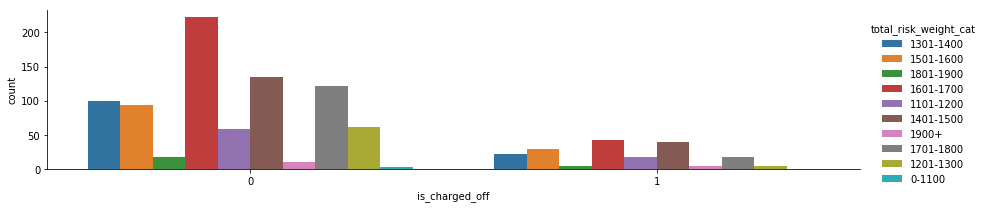

In [1828]:
sns.catplot(x="is_charged_off", hue="total_risk_weight_cat",kind="count",data=eda_final_subset, height=3, aspect=4) 

In [1829]:
# 4. Risk_Threshhold
# For the overall Risk Weight we will indetify a Threshhold value
# such that if for any customer overall Risk Weight is above that threshhold then loan may likely be approved or can attach a 
# higher risk categorization
# Let's see how charge offs counts are coming against total_risk_weight_cat
pd.crosstab(eda_final_subset['is_charged_off'], eda_final_subset['total_risk_weight_cat'])

total_risk_weight_cat,0-1100,1101-1200,1201-1300,1301-1400,1401-1500,1501-1600,1601-1700,1701-1800,1801-1900,1900+
is_charged_off,,,,,,,,,,
0,3,59,61,99,134,93,222,122,18,10
1,0,17,4,22,39,29,43,17,4,4


In [1830]:
eda_final_subset[eda_final_subset['is_charged_off'] == 1].groupby(['total_risk_weight_cat']).size()

total_risk_weight_cat
1101-1200    17
1201-1300     4
1301-1400    22
1401-1500    39
1501-1600    29
1601-1700    43
1701-1800    17
1801-1900     4
1900+         4
dtype: int64

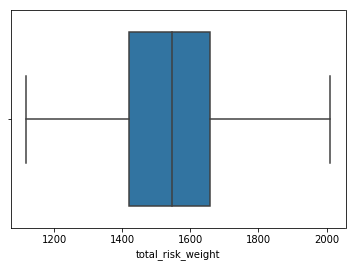

In [1831]:
sns.boxplot(x='total_risk_weight',data=eda_final_subset[eda_final_subset['is_charged_off'] == 1])

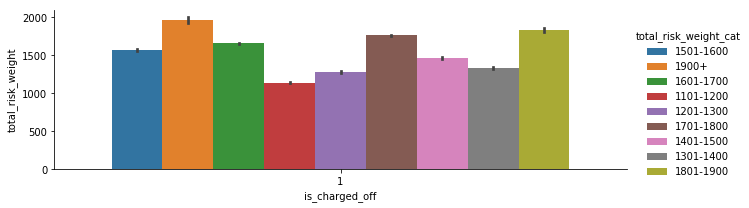

In [1832]:
sns.catplot(x='is_charged_off', y='total_risk_weight',hue='total_risk_weight_cat',kind='bar', data=eda_final_subset[eda_final_subset['is_charged_off'] == 1], height=3, aspect=3)

In [1833]:
eda_final_subset[eda_final_subset['is_charged_off'] == 1].groupby(['is_charged_off'])['total_risk_weight'].describe()

,count,mean,std,min,25%,50%,75%,max
is_charged_off,,,,,,,,
1,179.000,1519.823,194.132,1116.825,1420.640,1546.385,1658.295,2011.105


In [1834]:
eda_final_subset[(eda_final_subset['total_risk_weight'] >= 1421) &
                                  (eda_final_subset['is_charged_off'] == 1)].shape[0]                               

134

In [1835]:
eda_final_subset[~(eda_final_subset['total_risk_weight'] >= 1421) &
                                  (eda_final_subset['is_charged_off'] == 1)].shape[0]

45

In [1836]:
# Based on above charge off counts against different total_risk_weight_cat we can take threshhold value at around 25% mark
# for a sample of dataset comprising 1000 rows
total_risk_weight_thresh = eda_final_subset[eda_final_subset['is_charged_off'] == 1].groupby(
    ['is_charged_off'])['total_risk_weight'].quantile(0.25).round(decimals=0)
    
total_risk_weight_thresh

is_charged_off
1   1421.000
Name: total_risk_weight, dtype: float64

In [1837]:
# So 1421 is the total_risk_weight value for which 75% of the charge offs are above this threshhold for this 1000 row dataset

In [1838]:
# let's find teh threshhold value for complete dataset
eda_final['total_risk_weight_cat'] = eda_final['total_risk_weight'].apply(lambda x: '0-1100' if x<=1100 
                                           else '1101-1200' if x<=1200
                                           else '1201-1300' if x <=1300
                                           else '1301-1400' if x <=1400
                                           else '1401-1500' if x <=1500
                                           else '1501-1600' if x <=1600
                                           else '1601-1700' if x <=1700
                                           else '1701-1800' if x <=1800
                                           else '1801-1900' if x <=1900
                                           else '1900+'   )

In [1839]:
pd.crosstab(eda_final['is_charged_off'], eda_final['total_risk_weight_cat'])

total_risk_weight_cat,0-1100,1101-1200,1201-1300,1301-1400,1401-1500,1501-1600,1601-1700,1701-1800,1801-1900,1900+
is_charged_off,,,,,,,,,,
0,812,1807,2202,3936,4207,5152,8582,6313,692,387
1,103,349,303,634,772,884,1373,902,167,140


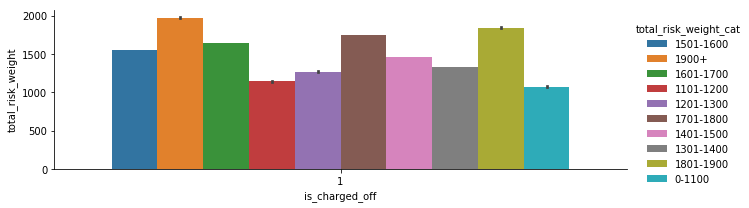

In [1840]:
sns.catplot(x='is_charged_off', y='total_risk_weight',hue='total_risk_weight_cat',kind='bar', data=eda_final[eda_final['is_charged_off'] == 1], height=3, aspect=3)

In [1841]:
eda_final[eda_final['is_charged_off'] == 1].groupby(['is_charged_off'])['total_risk_weight'].describe()

,count,mean,std,min,25%,50%,75%,max
is_charged_off,,,,,,,,
1,5627.000,1539.785,203.204,1030.055,1404.535,1581.445,1677.545,2073.935


In [1842]:
eda_final[(eda_final['total_risk_weight'] >= 1421) &
                                  (eda_final['is_charged_off'] == 1)].shape[0] 

4161

In [1843]:
eda_final[~(eda_final['total_risk_weight'] >= 1421) &
                                  (eda_final['is_charged_off'] == 1)].shape[0]

1466

In [1844]:
total_risk_weight_thresh_final = eda_final[eda_final['is_charged_off'] == 1].groupby(
    ['is_charged_off'])['total_risk_weight'].quantile(0.25).round(decimals=0)
    
total_risk_weight_thresh_final

is_charged_off
1   1405.000
Name: total_risk_weight, dtype: float64

In [1846]:
# So 1405 is the total_risk_weight value for which 75% of the charge offs are above this threshhold for the complete dataset
# Based on this threshold the Loan records can be categorized into different risk Grades just like in the given Dataset
# there are risk Grades A1, A2... F1,F2 etc. 